In [1]:
import pandas as pd

import geopandas as gpd
import branca.colormap as cm
import folium
from folium.plugins import TimeSliderChoropleth

%matplotlib inline

In [2]:
GOOGLE_DRIVE_BASE_PATH = "/content/drive/MyDrive/"
user = "Matthew"

if user == "Julia":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Matthew":
    DATA_PATH = "/Users/mdong/dataScience/projects-ml/ca-waste/" + "data/"
#     DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "Sustainability/ER131-Project/" + "data/"
elif user == "Samadi":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Shaye":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
    
print("User: {}\nPath to data: {}".format(user, DATA_PATH))

User: Matthew
Path to data: /Users/mdong/dataScience/projects-ml/ca-waste/data/


In [3]:
counties = gpd.read_file("../data/geospatial-data/CA_Counties_TIGER2016.shp") #YOUR CODE HERE

counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [4]:
counties.shape

(58, 18)

In [5]:
len(counties.NAME.unique())

58

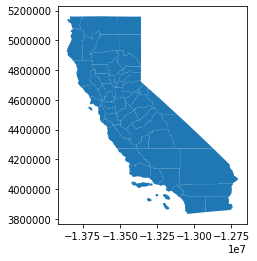

In [6]:
counties.plot()

In [7]:
county_shapes = counties[["NAME", "geometry"]]
county_shapes.rename(columns={"NAME":"County"}, inplace=True)
county_shapes.head()

/Users/mdong/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,County,geometry
0,Sierra,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,Sacramento,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,Santa Barbara,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,Calaveras,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,Ventura,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [8]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")
complete_feature_df.head()

,Year,Waste Produced (Tons),County,Population,Electricity Usage (GWh)
0,2000.0,1762385.98,San Bernardino,1710139.0,3950.485414
1,2001.0,1888556.78,San Bernardino,1741416.0,3717.427367
2,2002.0,1931424.51,San Bernardino,1782268.0,3817.733496
3,2003.0,2107128.88,San Bernardino,1825379.0,4251.079140
4,2004.0,2235251.83,San Bernardino,1875063.0,5044.577708


In [9]:
complete_feature_df["Year"] = pd.to_datetime(complete_feature_df['Year'], format="%Y").astype(int) / 10**9

In [10]:
len(complete_feature_df.County.unique())

57

In [11]:
# complete_feature_gdf = complete_feature_df.merge(county_shapes, on="County", how="inner")
complete_feature_gdf = county_shapes.merge(complete_feature_df, on="County", how="inner")
complete_feature_gdf = complete_feature_gdf[["Year", "County", "Waste Produced (Tons)", "geometry"]]
complete_feature_gdf.head()

,Year,County,Waste Produced (Tons),geometry
0,9.466848e+08,Sierra,2820.00,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,9.783072e+08,Sierra,2721.23,"POLYGON ((-13431319.751 4821511.426, -13431312..."
2,1.009843e+09,Sierra,2382.39,"POLYGON ((-13431319.751 4821511.426, -13431312..."
3,1.041379e+09,Sierra,2808.00,"POLYGON ((-13431319.751 4821511.426, -13431312..."
4,1.072915e+09,Sierra,2387.90,"POLYGON ((-13431319.751 4821511.426, -13431312..."


In [31]:
complete_feature_gdf.shape

(1130, 5)

In [12]:
max_colour = max(complete_feature_gdf['Waste Produced (Tons)'])
min_colour = min(complete_feature_gdf['Waste Produced (Tons)'])
cmap = cm.linear.YlOrRd_09.scale(min_colour, max_colour)
complete_feature_gdf['color'] = complete_feature_gdf['Waste Produced (Tons)'].map(cmap)
complete_feature_gdf.head()

,Year,County,Waste Produced (Tons),geometry,color
0,9.466848e+08,Sierra,2820.00,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff
1,9.783072e+08,Sierra,2721.23,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff
2,1.009843e+09,Sierra,2382.39,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff
3,1.041379e+09,Sierra,2808.00,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff
4,1.072915e+09,Sierra,2387.90,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff


In [13]:
# county_list = complete_feature_gdf['County'].unique().tolist()
# county_idx = range(len(county_list))
# style_data = {}

# for idx in county_idx:
#     county = county_list[idx]
# #     print(idx, county)
#     county_df = complete_feature_gdf[complete_feature_gdf.County == county]
#     choropleth_info = {}
#     for _, row in county_df.iterrows():
#         year, color, opacity = row["Year"], row["color"], 0.7
#         choropleth_info[year] = {"color": color, "opacity": opacity}
#     style_data[str(idx)] = choropleth_info

In [14]:
style_data = {}
for idx, row in complete_feature_gdf.iterrows():
    county = row["County"]
    county_df = complete_feature_gdf[complete_feature_gdf.County == county]
    choropleth_info = {}
    for idx, row in county_df.iterrows():
        year, color, opacity = row["Year"], row["color"], 0.7
        choropleth_info[year] = {"color": color, "opacity": opacity}
    style_data[county] = choropleth_info

In [15]:
len(style_data.keys())

57

In [16]:
style_data.get("0")

In [17]:
style_data.get("Orange")

{946684800.0: {'color': '#fece69ff', 'opacity': 0.7},
 978307200.0: {'color': '#fecd68ff', 'opacity': 0.7},
 1009843200.0: {'color': '#fece69ff', 'opacity': 0.7},
 1041379200.0: {'color': '#fec964ff', 'opacity': 0.7},
 1072915200.0: {'color': '#fec45fff', 'opacity': 0.7},
 1104537600.0: {'color': '#fec25dff', 'opacity': 0.7},
 1136073600.0: {'color': '#fecc68ff', 'opacity': 0.7},
 1167609600.0: {'color': '#fed470ff', 'opacity': 0.7},
 1199145600.0: {'color': '#ffdb79ff', 'opacity': 0.7},
 1230768000.0: {'color': '#ffdf81ff', 'opacity': 0.7},
 1262304000.0: {'color': '#ffdf83ff', 'opacity': 0.7},
 1293840000.0: {'color': '#ffe085ff', 'opacity': 0.7},
 1325376000.0: {'color': '#ffe186ff', 'opacity': 0.7},
 1356998400.0: {'color': '#ffe084ff', 'opacity': 0.7},
 1388534400.0: {'color': '#ffde81ff', 'opacity': 0.7},
 1420070400.0: {'color': '#ffdd7dff', 'opacity': 0.7},
 1451606400.0: {'color': '#ffdc7cff', 'opacity': 0.7},
 1483228800.0: {'color': '#ffda77ff', 'opacity': 0.7},
 1514764800.

In [18]:
# county_shapes = complete_feature_gdf[['geometry']]
# county_shapes = gpd.GeoDataFrame(county_shapes)
# county_shapes = county_shapes.drop_duplicates().reset_index(drop=True)
# county_shapes

In [19]:
# import json
# geojson = county_shapes.to_json()
# geojson = json.loads(geojson)
# geojson.keys()

In [20]:
# for feature in geojson["features"]:
#     print(feature["prop"])

In [21]:
# complete_feature_gdf.to_json()

In [32]:
complete_feature_gdf.head()

,Year,County,Waste Produced (Tons),geometry,color
0,946684800.0,Sierra,2820.00,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff
1,978307200.0,Sierra,2721.23,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff
2,1009843200.0,Sierra,2382.39,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff
3,1041379200.0,Sierra,2808.00,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff
4,1072915200.0,Sierra,2387.90,"POLYGON ((-13431319.751 4821511.426, -13431312...",#ffffccff


In [34]:
DATA_PATH + "geospatial-data/ca-counties.geojson"

'/Users/mdong/dataScience/projects-ml/ca-waste/data/geospatial-data/ca-counties.geojson'

In [37]:
ca_counties_geojson = DATA_PATH + "geospatial-data/ca-counties.geojson"

SF_COORDINATES = (37.76, -122.45)
m = folium.Map(location=SF_COORDINATES, zoom_start=6, tiles='cartodbpositron')

# m.choropleth(
#     geo_data=ca_counties_geojson,
#     data=complete_feature_gdf,
#     columns=['Year', 'Waste Produced (Tons)'],
#     key_on='feature.id',
#     fill_color= 'BuPu',
#     fill_opacity=0.7,
#     legend_name='Waste'
# )

folium.Choropleth(
    geo_data=ca_counties_geojson,
    data=complete_feature_gdf,
    columns=['County', 'Waste Produced (Tons)'],
    key_on='feature.properties.name',
    fill_color='BuPu'
).add_to(m)

m

In [23]:
complete_feature_gdf['Year'] = complete_feature_gdf['Year'].astype('str') 


In [24]:
complete_feature_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1130 entries, 0 to 1129
Data columns (total 5 columns):
Year                     1130 non-null object
County                   1130 non-null object
Waste Produced (Tons)    1130 non-null float64
geometry                 1130 non-null geometry
color                    1130 non-null object
dtypes: float64(1), geometry(1), object(3)
memory usage: 53.0+ KB


In [26]:
SF_COORDINATES = (37.76, -122.45)
ca_waste_map = folium.Map(location=SF_COORDINATES, zoom_start=6, tiles='cartodbpositron')

_ = TimeSliderChoropleth(
    data=complete_feature_gdf.to_json(default_handler=str),
    styledict=style_data,

).add_to(ca_waste_map)

_ = cmap.add_to(ca_waste_map)

# ca_waste_map.save(outfile=DATA_PATH + 'TimeSliderChoropleth.html')
ca_waste_map

TypeError: __init__() got an unexpected keyword argument 'default_handler'